Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


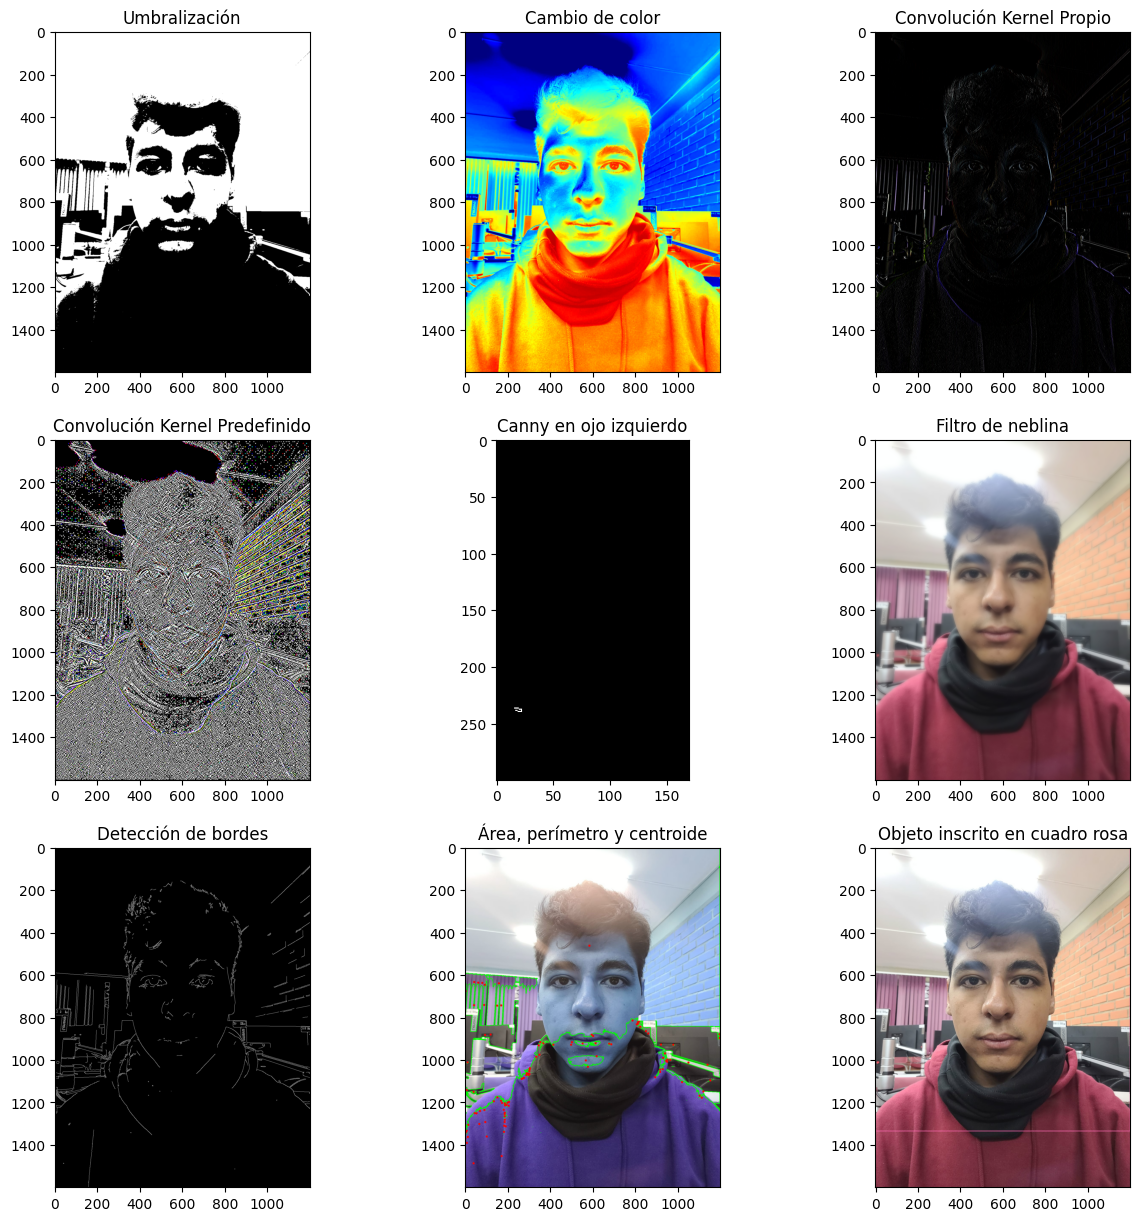

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("Yo.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresholded_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)


ColorCambiado = cv2.applyColorMap(image, cv2.COLORMAP_JET)


KernelMio = np.array([[1, 0, -1],
                       [1, 0, -1],
                       [1, 0, -1]])
Convolucionada = cv2.filter2D(image, -1, KernelMio)

Conco = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=5)

def add_haze(img, haze_factor=0.2):
    return cv2.addWeighted(img, 1 - haze_factor, np.ones(img.shape, img.dtype) * 255, haze_factor, 0)
inventando = add_haze(image)

lugares = cv2.Canny(image, 100, 200)


mascara = np.array([[1, 0, -1],[0, 1,  0],[-1, 0,  1]])

img_fin = cv2.filter2D(image, -1, mascara)



img_ojo = img_fin[400:700,630:800,:]
bordes = cv2.Canny(img_ojo, 100, 200)


imagen_original = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

imagen_empañada = cv2.GaussianBlur(imagen_original, (41, 41), 0)

img_fin = (0.3 * imagen_original + 0.7 * imagen_empañada).astype(np.uint8)







img_ojo = img_fin[400:700,630:800,:]
bordes = cv2.Canny(img_ojo, 100, 200)



Contornos, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
areas = [cv2.contourArea(cnt) for cnt in Contornos]
Perimetros = [cv2.arcLength(cnt, True) for cnt in Contornos]
M = [cv2.moments(cnt) for cnt in Contornos]
centroids = [(int(m['m10']/m['m00']), int(m['m01']/m['m00'])) if m['m00'] != 0 else (0, 0) for m in M]

ContornosImagen = image.copy()
cv2.drawContours(ContornosImagen, Contornos, -1, (0, 255, 0), 2)
for centroid in centroids:
    cv2.circle(ContornosImagen, centroid, 5, (255, 0, 0), -1)

Contornoooo = max(Contornos, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(Contornoooo)
cv2.rectangle(image_rgb, (x, y), (x+w, y+h), (255, 105, 180), 2)

plt.figure(figsize=(15, 15))
plt.subplot(331), plt.imshow(thresholded_image, cmap='gray'), plt.title('Umbralización')
plt.subplot(332), plt.imshow(ColorCambiado), plt.title('Cambio de color')
plt.subplot(333), plt.imshow(Convolucionada), plt.title('Convolución Kernel Propio')
plt.subplot(334), plt.imshow(Conco), plt.title('Convolución Kernel Predefinido')
plt.subplot(335), plt.imshow(bordes, cmap='gray'), plt.title('Canny en ojo izquierdo')
plt.subplot(336), plt.imshow(img_fin), plt.title('Filtro de neblina')
plt.subplot(337), plt.imshow(lugares, cmap='gray'), plt.title('Detección de bordes')
plt.subplot(338), plt.imshow(ContornosImagen), plt.title('Área, perímetro y centroide')
plt.subplot(339), plt.imshow(image_rgb), plt.title('Objeto inscrito en cuadro rosa')
plt.show()


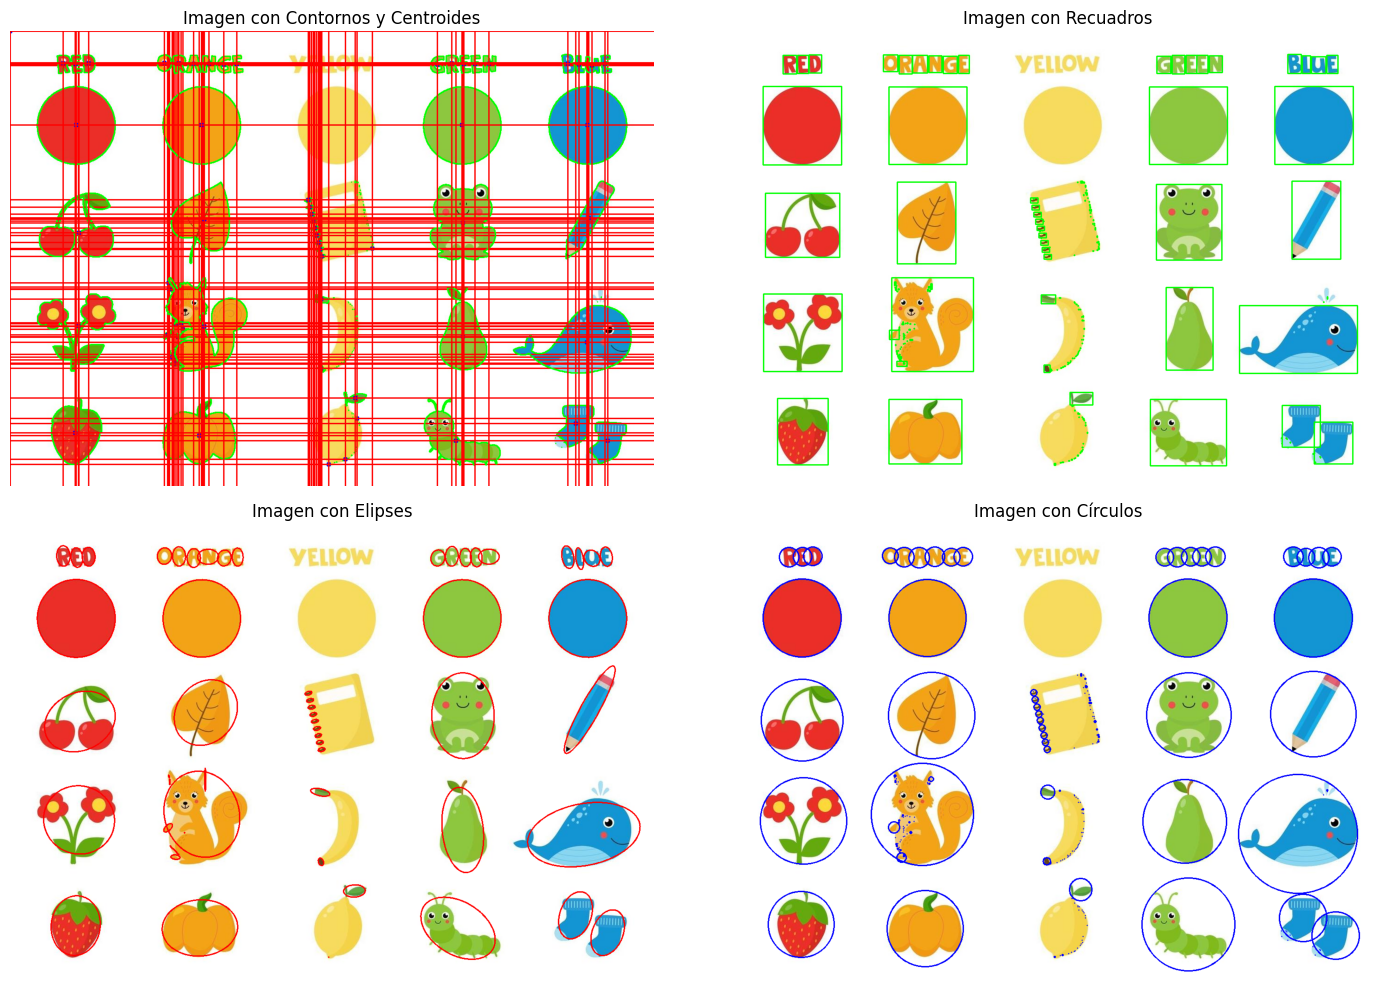

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
img = cv2.imread('colores.jpg')

# Convertir la imagen a RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convertir la imagen a escala de grises
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Binarizar la imagen
ret, umbral = cv2.threshold(gris, 200, 255, cv2.THRESH_BINARY_INV)

# Encontrar los contornos
contornos, jerarquia = cv2.findContours(umbral, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Crear una copia de la imagen original para dibujar
img_contornos = img_rgb.copy()
img_recuadros = img_rgb.copy()
img_elipses = img_rgb.copy()
img_circulos = img_rgb.copy()

# Recorrer cada contorno encontrado
for i, contar in enumerate(contornos):
    momento = cv2.moments(contar)
    if momento["m00"] != 0:
        cX = int(momento["m10"] / momento["m00"]) 
        cY = int(momento["m01"] / momento["m00"])  
    else:
        cX, cY = 0, 0

    # Calcular el área y el perímetro
    area = cv2.contourArea(contar)
    perimetro = cv2.arcLength(contar, True)

    # Inscribir en un recuadro
    x, y, w, h = cv2.boundingRect(contar)
    cv2.rectangle(img_recuadros, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Inscribir en una elipse
    if len(contar) >= 5:  # La función fitEllipse necesita al menos 5 puntos
        elipse = cv2.fitEllipse(contar)
        cv2.ellipse(img_elipses, elipse, (255, 0, 0), 2)

    # Inscribir en un círculo
    (x_circulo, y_circulo), radio = cv2.minEnclosingCircle(contar)
    centro = (int(x_circulo), int(y_circulo))
    cv2.circle(img_circulos, centro, int(radio), (0, 0, 255), 2)

    # Dibujar el contorno y el centroide
    cv2.drawContours(img_contornos, [contar], -1, (0, 255, 0), 2)
    cv2.circle(img_contornos, (cX, cY), 5, (0, 0, 255), -1)

    # Dibujar una línea divisoria en el medio
    cv2.line(img_contornos, (cX, 0), (cX, img.shape[0]), (255, 0, 0), 2)
    cv2.line(img_contornos, (0, cY), (img.shape[1], cY), (255, 0, 0), 2)

# Mostrar las imágenes
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.title('Imagen con Contornos y Centroides')
plt.imshow(img_contornos)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Imagen con Recuadros')
plt.imshow(img_recuadros)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Imagen con Elipses')
plt.imshow(img_elipses)
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Imagen con Círculos')
plt.imshow(img_circulos)
plt.axis('off')

plt.tight_layout()
plt.show()


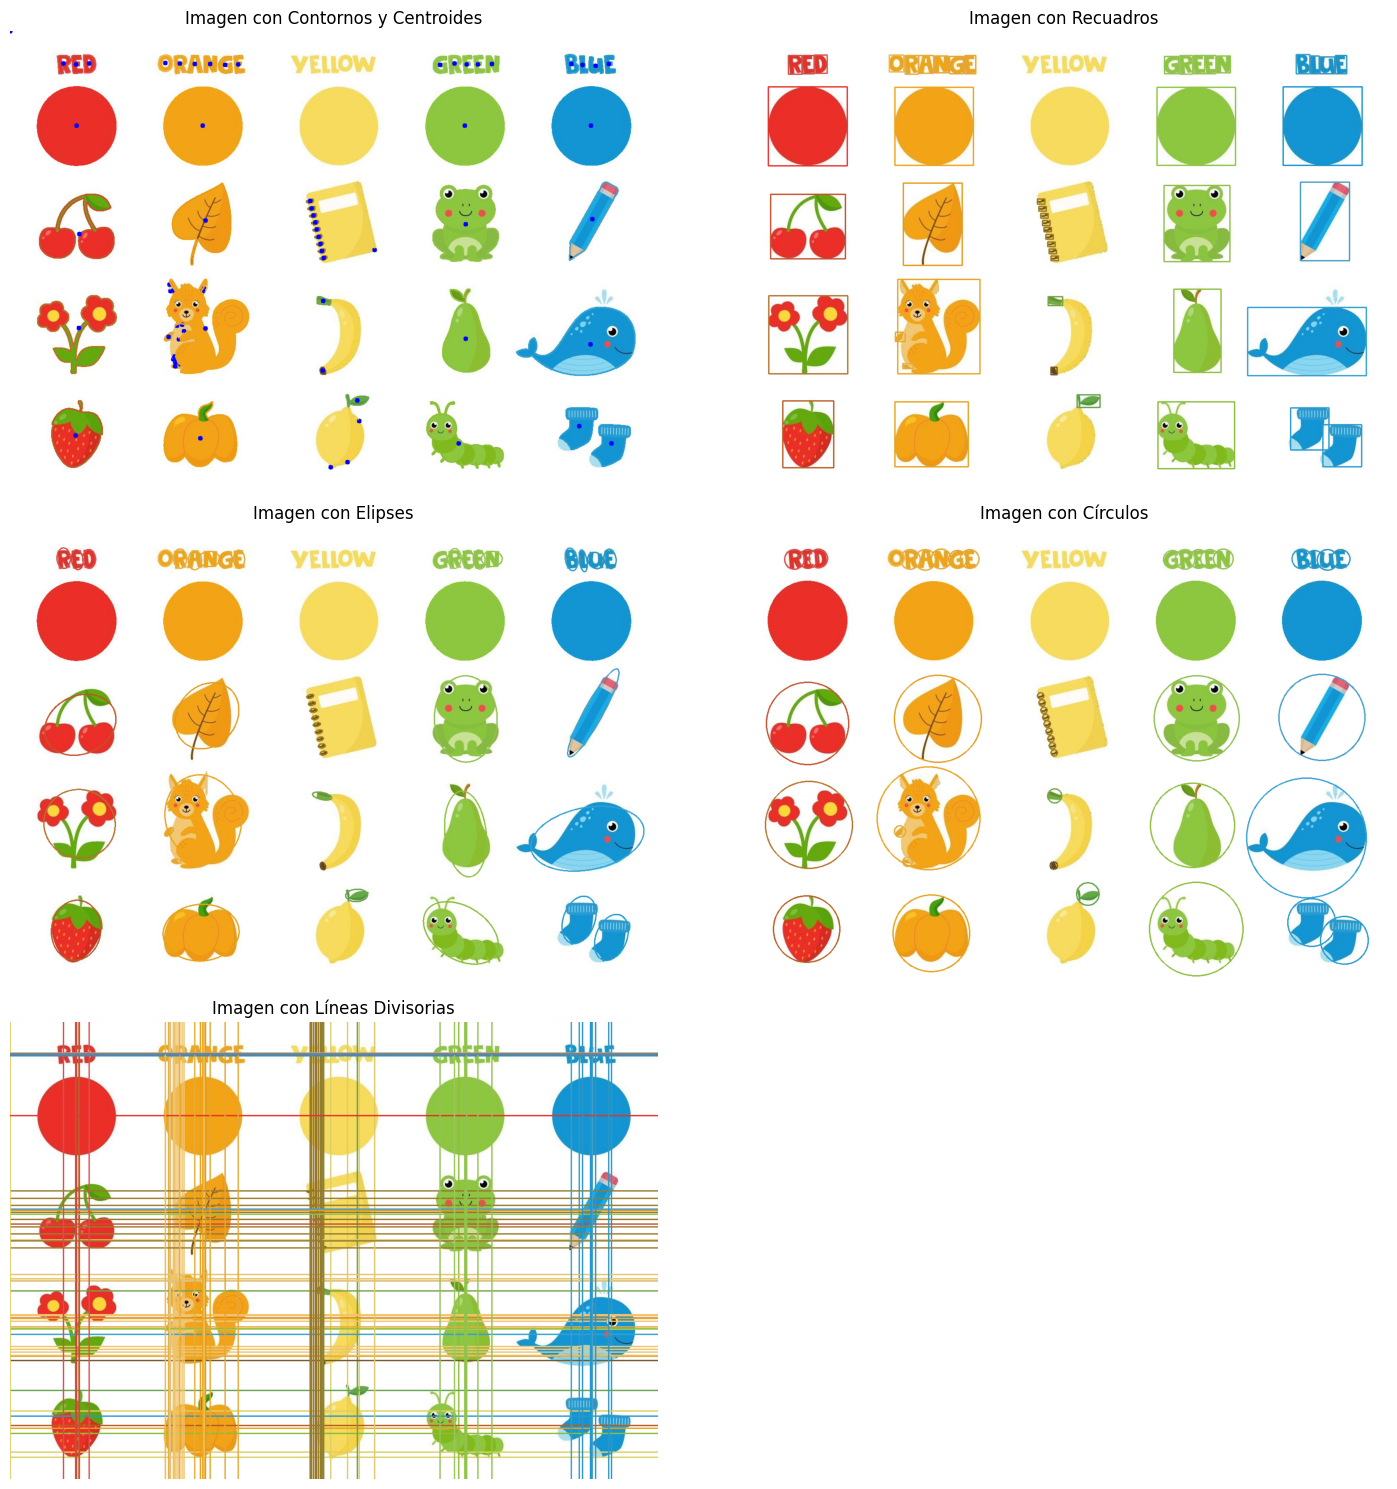

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para obtener el color promedio del objeto
def get_average_color(image, contour):
    mask = np.zeros(image.shape[:2], dtype="uint8")
    cv2.drawContours(mask, [contour], -1, 255, -1)
    mean = cv2.mean(image, mask=mask)[:3]
    return tuple(map(int, mean))

# Cargar la imagen
img = cv2.imread('colores.jpg')

# Convertir la imagen a RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convertir la imagen a escala de grises
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Binarizar la imagen
ret, umbral = cv2.threshold(gris, 200, 255, cv2.THRESH_BINARY_INV)

# Encontrar los contornos
contornos, jerarquia = cv2.findContours(umbral, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Crear una copia de la imagen original para dibujar
img_contornos = img_rgb.copy()
img_recuadros = img_rgb.copy()
img_elipses = img_rgb.copy()
img_circulos = img_rgb.copy()
img_lineas = img_rgb.copy()

# Recorrer cada contorno encontrado
for i, contar in enumerate(contornos):
    momento = cv2.moments(contar)
    if momento["m00"] != 0:
        cX = int(momento["m10"] / momento["m00"]) 
        cY = int(momento["m01"] / momento["m00"])  
    else:
        cX, cY = 0, 0

    # Calcular el área y el perímetro
    area = cv2.contourArea(contar)
    perimetro = cv2.arcLength(contar, True)

    # Obtener el color promedio del objeto
    color_promedio = get_average_color(img_rgb, contar)

    # Inscribir en un recuadro
    x, y, w, h = cv2.boundingRect(contar)
    cv2.rectangle(img_recuadros, (x, y), (x + w, y + h), color_promedio, 2)

    # Inscribir en una elipse
    if len(contar) >= 5:  # La función fitEllipse necesita al menos 5 puntos
        elipse = cv2.fitEllipse(contar)
        cv2.ellipse(img_elipses, elipse, color_promedio, 2)

    # Inscribir en un círculo
    (x_circulo, y_circulo), radio = cv2.minEnclosingCircle(contar)
    centro = (int(x_circulo), int(y_circulo))
    cv2.circle(img_circulos, centro, int(radio), color_promedio, 2)

    # Dibujar el contorno y el centroide
    cv2.drawContours(img_contornos, [contar], -1, color_promedio, 2)
    cv2.circle(img_contornos, (cX, cY), 5, (0, 0, 255), -1)

    # Dibujar una línea divisoria en el medio
    cv2.line(img_lineas, (cX, 0), (cX, img.shape[0]), color_promedio, 2)
    cv2.line(img_lineas, (0, cY), (img.shape[1], cY), color_promedio, 2)

# Mostrar las imágenes
plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
plt.title('Imagen con Contornos y Centroides')
plt.imshow(img_contornos)
plt.axis('off')

plt.subplot(3, 2, 2)
plt.title('Imagen con Recuadros')
plt.imshow(img_recuadros)
plt.axis('off')

plt.subplot(3, 2, 3)
plt.title('Imagen con Elipses')
plt.imshow(img_elipses)
plt.axis('off')

plt.subplot(3, 2, 4)
plt.title('Imagen con Círculos')
plt.imshow(img_circulos)
plt.axis('off')

plt.subplot(3, 2, 5)
plt.title('Imagen con Líneas Divisorias')
plt.imshow(img_lineas)
plt.axis('off')

plt.tight_layout()
plt.show()
